<a href="https://colab.research.google.com/github/nekMont/Machine-Learning/blob/main/02_neural_network_classification_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another

A few types of classification problems
* Binary classification
* Mutliclass classification
* Multilable classification 


## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles 

# make 1000 examples
n_samples = 1000

# Create circles 
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [2]:
#check out features 
X 

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand rn,
lets visualize it.

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1], "Label":y})
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


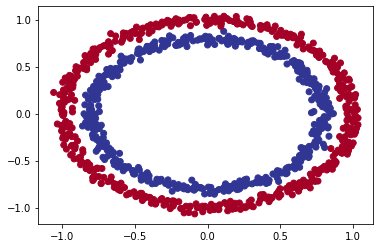

In [5]:
#visualize with a plot 
import matplotlib.pyplot as plt 
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

# Input and ouput shapes 

In [9]:
# Check the shapes of our features and labels 
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# How many samples we're working with 
len(X), len(y)

(1000, 1000)

In [11]:
# view the first example of features and labels 
X[0], y[0] #remeber that y is our label.


(array([0.75424625, 0.23148074]), 1)

# Steps in modelling 
The steps in modelling with TensorFlow are typically: 
* 1. Create or import a model
* 2. compile model
* 3. fit the model 
* 4. evaluate the model 
* 5. Tweak 
* 6. Evaluate

In [12]:
import tensorflow as tf

In [13]:
# Test model 


tf.random.set_seed(42)

#1. Create a model (specified to the problem )
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(1)
])

#2. Compile the model 
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

#3. fit the model
model.fit(X, y, epochs=5)

#4. evaluate 

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 6.3157 - accuracy: 0.4900
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 6.1061 - accuracy: 0.4840
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 5.9194 - accuracy: 0.4880
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 5.1366 - accuracy: 0.4690
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 4.5409 - accuracy: 0.4680


In [14]:
model.fit(X,y, epochs=200, verbose=0) 
model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're on binary classification problem and our model is getting around ~50% accuracy...
it's performing as if it's guessing.

So let's step things up a notch and add an extra layer. 


In [15]:
#set the random seed.
tf.random.set_seed(42)

#1. Create a model, this time with 2 layes.

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2.compile the model 
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=["accuracy"]
                 )
#3. fit the model
model_1.fit(X,y, epochs=200, verbose=0)

#4.evaluate 
model_1.evaluate(X,y)

#It is important to remember that our data sets are 50/50 about 500 and 500

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6935176253318787, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers or increase the number of hidden units in a layer
2. Compiling a model - here we might want to choose a different optimization function such as Adam instead of SGD()
3. fitting a model - Perhaps we might fit our model for more epochs ( leave it trainging for longer).

In [16]:
#set the random seed
tf.random.set_seed(42)

#create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model 

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
model_2.fit(X, y, epochs=100, verbose=0)
model_2.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.5090


[0.7003178000450134, 0.5090000033378601]

In [17]:
#Visualizing to see what is happening
model_2.predict(X[:10])

1/1 [==============================] - 0s 160ms/step


array([[0.479946  ],
       [0.5750726 ],
       [0.58019453],
       [0.5836329 ],
       [0.43258736],
       [0.58832085],
       [0.56516546],
       [0.4737596 ],
       [0.47923318],
       [0.58543986]], dtype=float32)

To Visualize our models predictions, lets create a function `plot_decision_boundary()`, This function will: 

* Take in a trained model, features(X) and labels (y)
* Create a meshgrid(numpy) of the different X values 
* Make predictions across the meshgrid
* plot the predictions as well as a line between the oznes(where each unique class fails) 

In [18]:
import numpy as np

In [19]:

def plot_decision_boundary(model, X, y):
  """ 
  plots the decision boundary created by a model predicting on X 
  """ 
  #Define the axis boundaries of the plot and create a meshgrid 
  x_min, x_max= X[:,0].min() - 0.1, X[:,0].max() + 0.1 
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  #adding 0.1 to act as a margin.

  #mesh grid 
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  
  #Create X value(we're going to make predictions on these)
  #unraveling
  x_in = np.c_[xx.ravel(),yy.ravel()] #stack 2d arrays together
  #make predictions
  y_pred=model.predict(x_in)

  #check if we are working on multi-class problem 
  if len(y_pred[0] > 1): 
    print("doing multi-class")
    #if so we need to reshap the data.
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else: 
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  #plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1], c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



313/313 [==============================] - 1s 2ms/step
doing multi-class


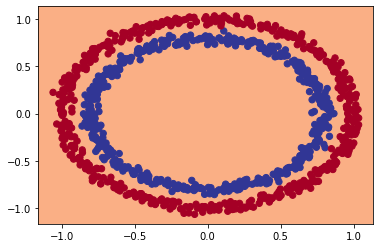

In [20]:
#now check out the predictions our model is making
plot_decision_boundary(model=model_2, X=X, y=y)

In [21]:
x_min,x_max= X[:, 0].min() - 0.1, X[:,0].max() + 0.1 
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
x_min,x_max,y_min, y_max


(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [23]:
# Define a simple linear regression model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
model_2.compile(loss='mean_squared_error', optimizer='sgd')

# Reshape the training data
X_reg_train = tf.reshape(X_reg_train, [-1, 1])
y_reg_train = tf.reshape(y_reg_train, [-1, 1])

# Fit the model on the training data
model_2.fit(X_reg_train, y_reg_train, epochs=100)


Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 88896106707633994693236999847936.0000
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: inf
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: nan
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: nan
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: nan
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: nan
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: nan
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: nan
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: nan
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: nan
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: nan
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: nan
Epoch 13/100
5/5 [==============================] - 0s 4ms/step

Oh wait... we compiled our model for a binary classification problem.

But... we're  now working on a regression problem, let's change the model to suit our data.

In [24]:
# Reshape the input data
X_reg_train = tf.reshape(X_reg_train, shape=(-1, 1))
X_reg_test = tf.reshape(X_reg_test, shape=(-1, 1))

# Define the model architecture
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# Compile the model
model_2.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

# Train the model
model_2.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 305.0424 - mae: 305.0424
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 286.0018 - mae: 286.0018
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 267.8518 - mae: 267.8518
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 249.4349 - mae: 249.4349
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 230.9359 - mae: 230.9359
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 211.8822 - mae: 211.8822
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 193.1718 - mae: 193.1718
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 174.7578 - mae: 174.7578
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 156.7370 - mae: 156.7370
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 138.0916 - mae: 138.0916
Epoch 11/100
5/5 [====================